In [55]:
library(sqldf)
library(ggplot2)

# Frequência de Compromissários

In [1]:
compromissario_nomeArquivo = read.csv('compromissario_nomeArquivo.csv', sep = '\t')

In [2]:
head(compromissario_nomeArquivo)

id,compromissario,numero,nome_arquivo
0,minimercado jung e horn ltda,00715.00017/2016,1604.pdf
1,luciano knebel ottonelli,00794.00023/2016,2768.pdf
2,juarez neme da costa,00794.00023/2016,2768.pdf
3,fernando zamin,00794.00023/2016,2768.pdf
4,ronaldo lara resende,00771.00048/2016,2400.pdf
5,luisinho maximino dalavechia,00908.00013/2016,187.pdf


In [39]:
compromissarioFreq = sqldf('select compromissario, count(nome_arquivo) as freq from
                            compromissario_nomeArquivo 
                            where compromissario != "Não identificado"
                            group by compromissario
                            order by freq desc;')

In [40]:
dim(compromissarioFreq)

[1] 2718    2

In [41]:
head(compromissarioFreq)

compromissario,freq
everton luís resmini meneses,24
fundo para reconstituição de bens lesados,16
evandro lobato kaltbach,7
luziharin carolina tramontina,7
plano de prevenção conta incêndio,7
título ii,7


In [42]:
# Compromissário q aparece mais que 7 vezes
compromissario = subset(compromissarioFreq, freq >= 7)

In [43]:
dim(compromissario)

[1] 6 2

In [44]:
compromissario

compromissario,freq
everton luís resmini meneses,24
fundo para reconstituição de bens lesados,16
evandro lobato kaltbach,7
luziharin carolina tramontina,7
plano de prevenção conta incêndio,7
título ii,7


# Assunto por Cidade

In [46]:
assunto_cidade = read.csv('cidade_assunto.csv', sep = '\t')

In [47]:
head(assunto_cidade)

id,cidade,assunto,numero,nome_arquivo
0,Não identificado,DEFESA DA CIDADANIA - SAÚDE PÚBLICA,00715.00017/2016,1604.pdf
1,ijuí,DEFESA COMUNITÁRIA - RESÍDUOS SÓLIDOS - OUTROS,00794.00023/2016,2768.pdf
2,Não identificado,DEFESA COMUNITÁRIA - FAUNA,00771.00048/2016,2400.pdf
3,Não identificado,DEFESA COMUNITÁRIA - FLORA,00908.00013/2016,187.pdf
4,Não identificado,DEFESA DA CIDADANIA - SAÚDE PÚBLICA,00731.00003/2011,1842.pdf
5,bom jesus,DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,00725.00008/2015,3849.pdf


In [48]:
cidade_assunto_freq = sqldf('select cidade, assunto, count(assunto) as freq_assunto 
                            from assunto_cidade
                            where cidade != "Não identificado"
                            group by cidade
                            order by freq_assunto desc;')

In [49]:
dim(cidade_assunto_freq)

[1] 221   3

In [50]:
head(cidade_assunto_freq)

cidade,assunto,freq_assunto
torres,DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,111
alegrete,"DEFESA COMUNITÁRIA - RESÍDUOS SÓLIDOS (URBANOS, INDUSTRIAIS, HOSPITALARES, ...)",61
caxias do sul,DEFESA COMUNITÁRIA - LOTEAMENTOS IRREGULARES OU CLANDESTINOS,54
viamão,DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,54
passo fundo,DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,52
porto alegre,DEFESA COMUNITÁRIA - FLORA,48


In [51]:
# frequência maior ou igual 48
cidade_assunto_freq2 = subset(cidade_assunto_freq, freq_assunto >= 48)

In [54]:
dim(cidade_assunto_freq2)

[1] 6 3

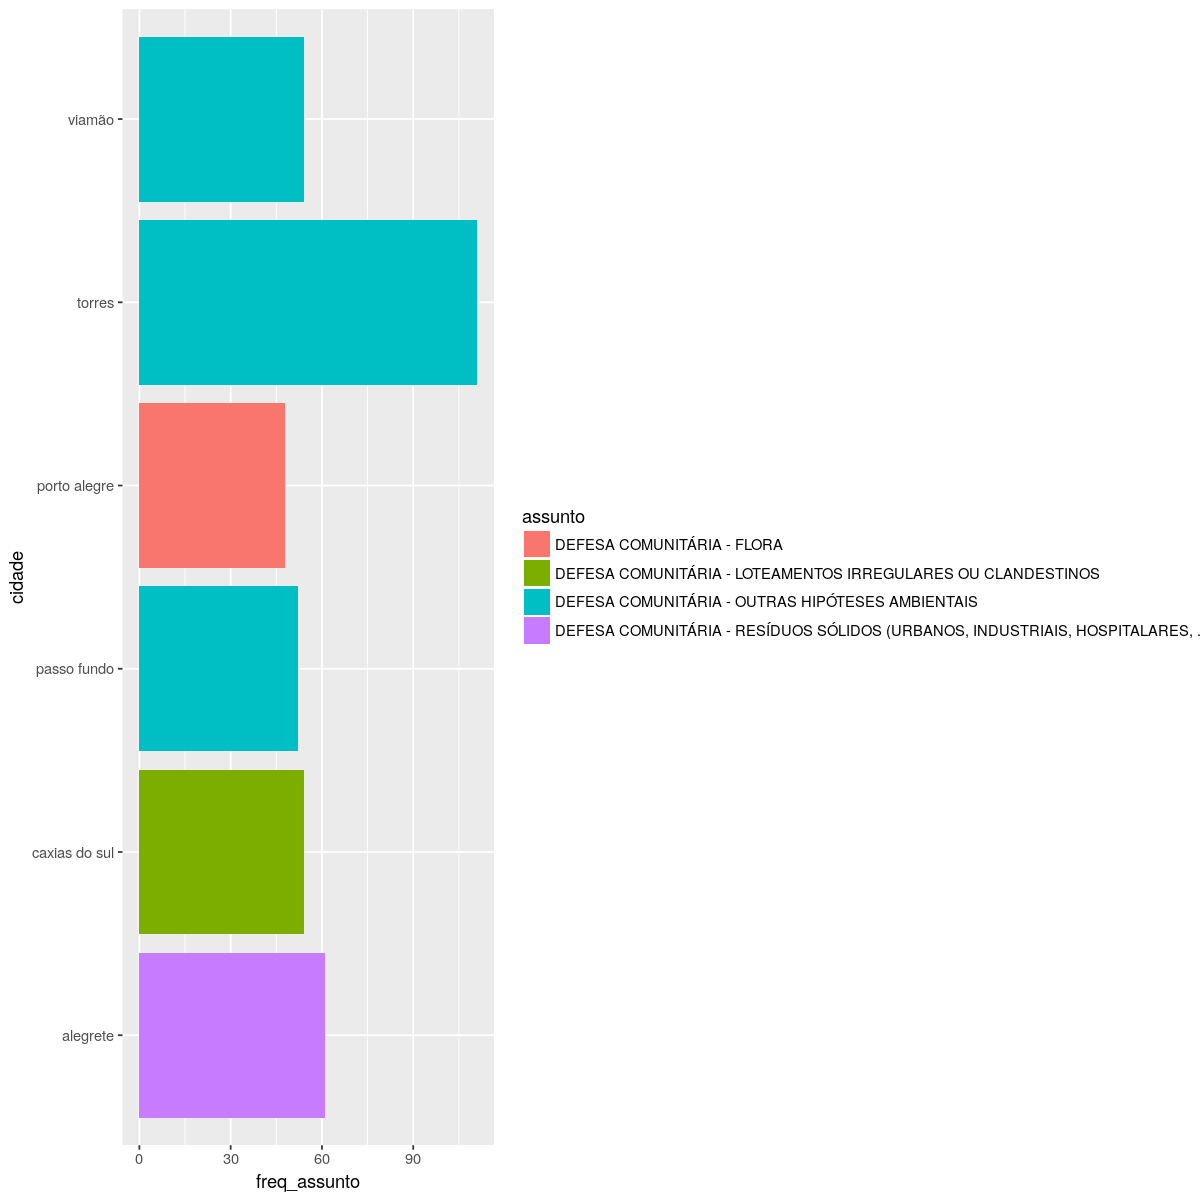

In [62]:
options(repr.plot.width=10, repr.plot.height=10)
p<-ggplot(data=cidade_assunto_freq2, 
          aes(x=cidade, y=freq_assunto, fill=assunto)) +
  geom_bar(stat="identity") +
  coord_flip()
p

# Valor Mediano por assunto

In [64]:
promotor_assunto_valor = read.csv('promotor_assunto_valor.csv', sep = '\t')

In [65]:
head(promotor_assunto_valor)

promotor,assunto,valor,numero,nome_arquivo
PAULO ESTEVAM COSTA CASTRO ARAÚJO,DEFESA DA CIDADANIA - SAÚDE PÚBLICA,10000,00715.00017/2016,1604.pdf
DIOLINDA KURRLE HANNUSCH,DEFESA COMUNITÁRIA - RESÍDUOS SÓLIDOS - OUTROS,10000,00794.00023/2016,2768.pdf
RONALDO LARA RESENDE,DEFESA COMUNITÁRIA - FAUNA,510,00771.00048/2016,2400.pdf
MARCIO SCHENATO,DEFESA COMUNITÁRIA - FLORA,1000,00908.00013/2016,187.pdf
MICHAEL SCHNEIDER FLACH,DEFESA DA CIDADANIA - SAÚDE PÚBLICA,10000,00731.00003/2011,1842.pdf
BIANCA ACIOLY DE ARAUJO,DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,1000,00725.00008/2015,3849.pdf


In [88]:
# Valor mediano é menos afetado por outliers
assunto_valorMediano = sqldf('select assunto, MEDIAN(valor) as valor_mediano
                            from promotor_assunto_valor
                            group by assunto
                            order by valor_mediano desc;')

In [89]:
dim(assunto_valorMediano)

[1] 186   2

In [91]:
head(assunto_valorMediano, 10)

assunto,valor_mediano
DEFESA COMUNITÁRIA - FAUNA / DEFESA COMUNITÁRIA - LOTEAMENTOS IRREGULARES OU CLANDESTINOS,764522.3
CRIMINAL - MEIO AMBIENTE / DEFESA COMUNITÁRIA - FLORA / DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,350250.0
DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES DE HABITAÇÃO E ORDEM URBANÍSTICA / DEFESA DA CIDADANIA - OUTRAS HIPÓTESES,149792.0
"DEFESA COMUNITÁRIA - LOTEAMENTOS IRREGULARES OU CLANDESTINOS / DEFESA COMUNITÁRIA - POLUIÇÃO HÍDRICA (EFLUENTES DOMÉSTICOS, ...)",100000.0
"DEFESA COMUNITÁRIA - AGROTÓXICO / DEFESA COMUNITÁRIA - POLUIÇÃO HÍDRICA (EFLUENTES DOMÉSTICOS, ...)",50000.0
DEFESA COMUNITÁRIA - FLORA / DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES DE HABITAÇÃO E ORDEM URBANÍSTICA,50000.0
DEFESA COMUNITÁRIA - POLUIÇÃO SONORA / DEFESA COMUNITÁRIA - RESÍDUOS SÓLIDOS - OUTROS,50000.0
DEFESA COMUNITÁRIA - POLUIÇÃO ATMOSFÉRICA / DEFESA COMUNITÁRIA - POLUIÇÃO SONORA,27500.0
"DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS / DEFESA COMUNITÁRIA - PATRIMÔNIO HISTÓRICO, TURÍSTICO, PAISAGÍSTICO E CULTURAL",20759.0
CÍVEL - OUTRAS HIPÓTESES / DEFESA COMUNITÁRIA - FLORA / DEFESA COMUNITÁRIA - POLUIÇÃO ATMOSFÉRICA,20000.0


# Assunto mais tratado por cada Promotor

In [97]:
promotor_assunto = sqldf('select promotor, assunto, count(assunto) as freq_assunto
                        from promotor_assunto_valor
                        group by promotor
                        order by freq_assunto desc;')

In [98]:
dim(promotor_assunto)

[1] 254   3

In [113]:
head(promotor_assunto)

promotor,assunto,freq_assunto
PAULO DA SILVA CIRNE,DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,137
MÁRCIO ROBERTO SILVA DE CARVALHO,DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,119
PAULA REGINA MOHR,DEFESA COMUNITÁRIA - FLORA,102
DÉBORA JAEGER BECKER,DEFESA COMUNITÁRIA - FLORA,101
DIEGO PESSI,DEFESA COMUNITÁRIA - LOTEAMENTOS IRREGULARES OU CLANDESTINOS,95
ADRIO RAFAEL PAULA GELATTI,DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,94


In [108]:
df = merge(x = promotor_assunto, y = assunto_valorMediano, by = "assunto", all.x=T)

In [110]:
promotor_freqAssunto_valorMedi = sqldf('select promotor, assunto, 
                                        freq_assunto, valor_mediano
                                        from df
                                        order by freq_assunto desc;')

In [111]:
dim(promotor_freqAssunto_valorMedi)

[1] 254   4

In [112]:
head(promotor_freqAssunto_valorMedi)

promotor,assunto,freq_assunto,valor_mediano
PAULO DA SILVA CIRNE,DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,137,1576
MÁRCIO ROBERTO SILVA DE CARVALHO,DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,119,1576
PAULA REGINA MOHR,DEFESA COMUNITÁRIA - FLORA,102,2000
DÉBORA JAEGER BECKER,DEFESA COMUNITÁRIA - FLORA,101,2000
DIEGO PESSI,DEFESA COMUNITÁRIA - LOTEAMENTOS IRREGULARES OU CLANDESTINOS,95,1000
ADRIO RAFAEL PAULA GELATTI,DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,94,1576


In [116]:
df2 = subset(promotor_freqAssunto_valorMedi, freq_assunto >= 94)

In [117]:
dim(df2)

[1] 6 4

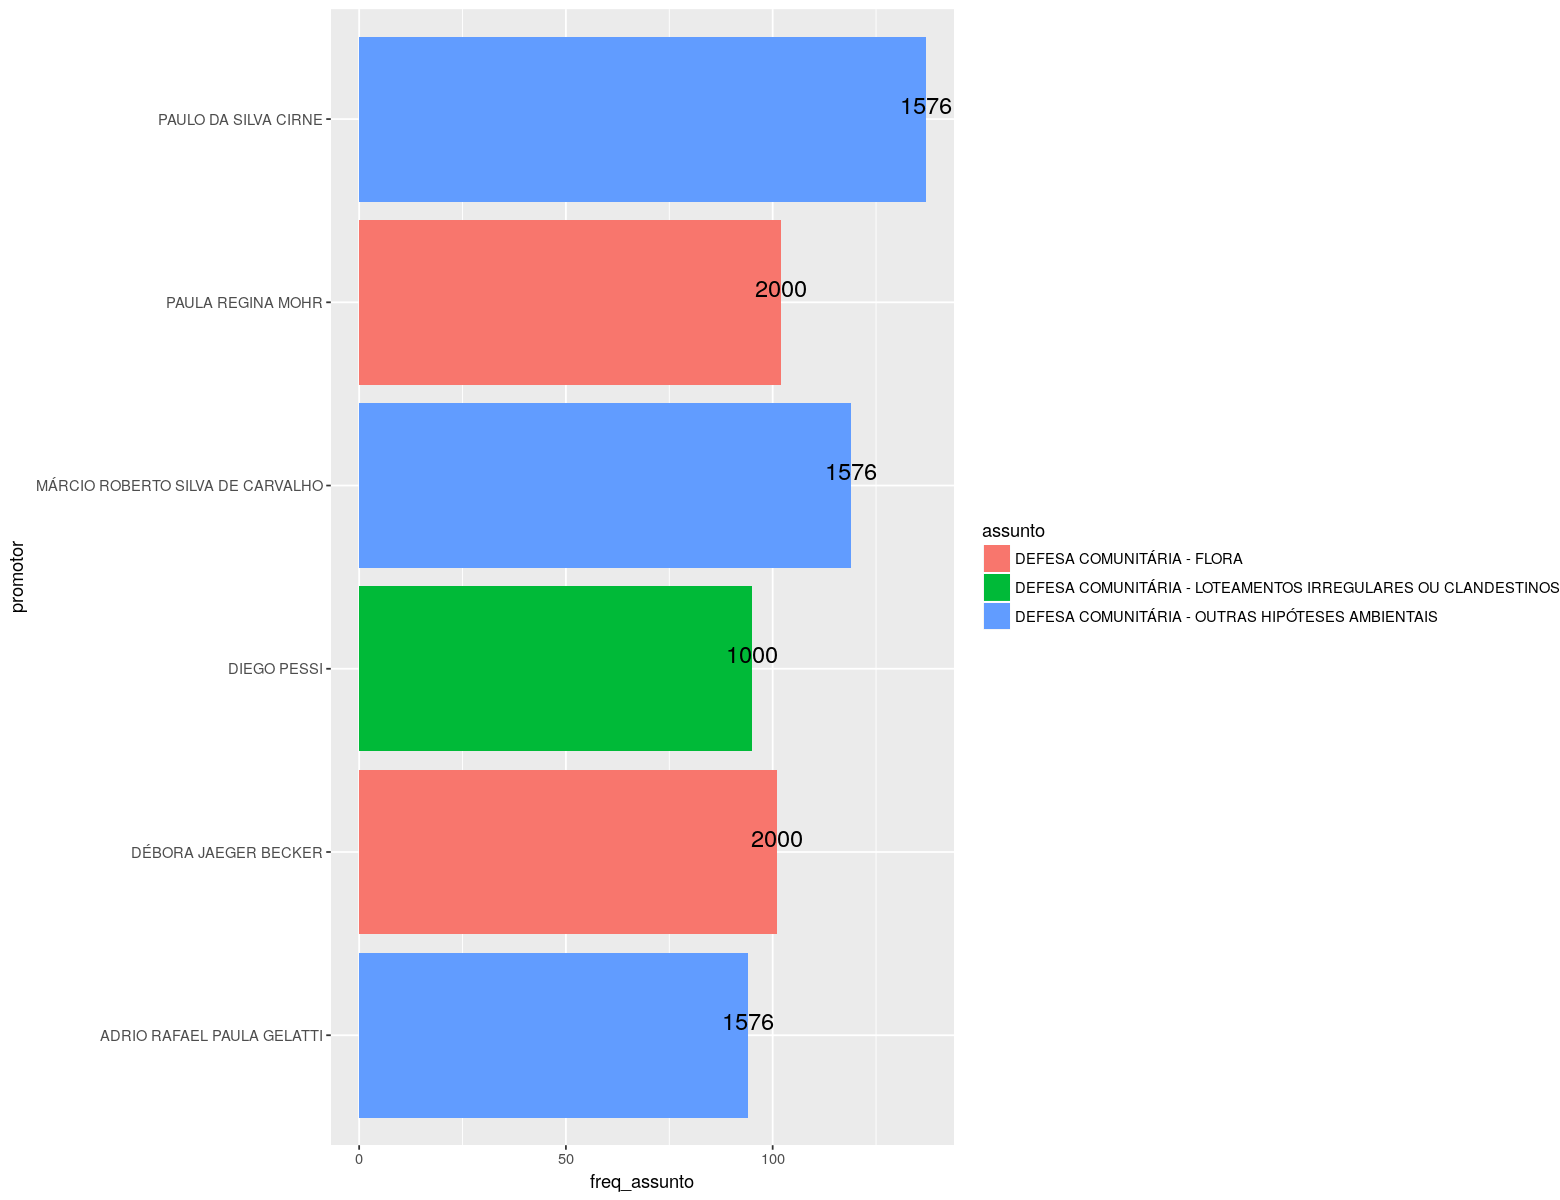

In [141]:
# Valor mediano do assunto no topo de cada barra
options(repr.plot.width=13, repr.plot.height=10)
p2<-ggplot(data=df2, 
          aes(x=promotor, y=freq_assunto, fill=assunto)) +
  geom_bar(stat="identity") +
  geom_text(aes(label=valor_mediano), vjust=-0.3, size=5)+
  coord_flip()
p2

# Referências mais frequêntes por assunto

In [142]:
assunto_referencia = read.csv('assunto_referencia.csv', sep='\t')

In [143]:
head(assunto_referencia)

X,assunto,referencia,numero,nome_arquivo
0,DEFESA DA CIDADANIA - SAÚDE PÚBLICA,"artigo 5°, parágrafo 6°, da lei n° 7.347/85 e o provimento n.º 26/08 do procurador-geral de justiça",00715.00017/2016,1604.pdf
1,DEFESA DA CIDADANIA - SAÚDE PÚBLICA,parágrafo 6º do artigo 5º da lei n,00715.00017/2016,1604.pdf
2,DEFESA DA CIDADANIA - SAÚDE PÚBLICA,lei federal n,00715.00017/2016,1604.pdf
3,DEFESA COMUNITÁRIA - FAUNA,"artigo 26, § 4º, da do provimento 12/2011",00771.00048/2016,2400.pdf
4,DEFESA COMUNITÁRIA - FAUNA,parágrafo 3o do artigo 9o da lei n.o 7.347/85.,00771.00048/2016,2400.pdf
5,DEFESA COMUNITÁRIA - FAUNA,art,00771.00048/2016,2400.pdf


In [147]:
assunto_ReferFreq = sqldf('select assunto, referencia, 
                          count(referencia) as freq
                         from assunto_referencia
                        group by assunto
                        order by freq desc;')

In [148]:
dim(assunto_ReferFreq)

[1] 178   3

In [149]:
head(assunto_ReferFreq)

assunto,referencia,freq
DEFESA COMUNITÁRIA - OUTRAS HIPÓTESES AMBIENTAIS,"artigo 14, inciso iv",3558
DEFESA COMUNITÁRIA - FLORA,artigo 27 e seus parágrafos do provimento,2681
"DEFESA COMUNITÁRIA - OUTRAS QUESTÕES DE CONSUMO (VENDA CASADA, CONSÓRCIOS, ...)","artigo 5º, § 6º, da lei 7.347/85 e do art",1069
"DEFESA COMUNITÁRIA - PRODUTOS IRREGULARES (IRREGULARIDADES NO RÓTULO, ADULTERADOS, NOCIVOS À SAÚDE)","artigo 9º, § 3º, da lei nº 7.437, de 24 de julho de 1985",671
DEFESA COMUNITÁRIA - FAUNA,"artigo 585, inciso viii, do código de processo civil",562
DEFESA COMUNITÁRIA - POLUIÇÃO SONORA,"artigo 5º, § 6º, da lei n",518
